In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

In [4]:
(x_train,y_train),(x_test,y_test) = tf.keras.datasets.fashion_mnist.load_data()

In [14]:
x_train.min()

0

In [7]:
x_test.shape

(10000, 28, 28)

In [15]:
x_train_scaled = x_train/255
x_test_scaled = x_test/255

In [24]:
y_train_categorical = keras.utils.to_categorical(y_train,num_classes=10) 
y_test_categorical = keras.utils.to_categorical(y_test,num_classes=10)

In [17]:
class_labels=['Top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle Boot']

In [57]:
def getmodel(hidden_layers =1):
    model = tf.keras.Sequential()
    model.add(keras.layers.Flatten(input_shape=(28,28)))
    for i in range(hidden_layers):
        model.add(keras.layers.Dense(500,activation='relu'))
    model.add(keras.layers.Dense(10,activation='sigmoid'))
    model.compile(
            optimizer='SGD',loss='categorical_crossentropy',metrics=['accuracy']
    )
    return model

In [59]:
model1 = getmodel(1)
model1.fit(x_train_scaled,y_train_categorical,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.7047 - accuracy: 0.7752
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4989 - accuracy: 0.8303
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4562 - accuracy: 0.8440
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4316 - accuracy: 0.8515
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4133 - accuracy: 0.8569


In [61]:
%%timeit -n1 -r1
model5 = getmodel(5)
model5.fit(x_train_scaled,y_train_categorical,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 15s 8ms/step - loss: 0.7296 - accuracy: 0.7496
Epoch 2/5
1875/1875 [==============================] - 14s 8ms/step - loss: 0.4574 - accuracy: 0.8369
Epoch 3/5
1875/1875 [==============================] - 15s 8ms/step - loss: 0.3981 - accuracy: 0.8575
Epoch 4/5
1875/1875 [==============================] - 15s 8ms/step - loss: 0.3672 - accuracy: 0.8669
Epoch 5/5
1875/1875 [==============================] - 15s 8ms/step - loss: 0.3435 - accuracy: 0.8741
1min 15s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [94]:
def plot_function(index):
    plt.figure(figsize=(10,1))
    plt.imshow(x_test[index])
    plt.xlabel(class_labels[y_test[index]])

PREDICTION

In [95]:
class_labels[np.argmax(model5.predict(x_test_scaled[1]))]

1/1 [==============================] - 0s 33ms/step


'Pullover'

In [96]:
class_labels[y_test[1]]

'Pullover'

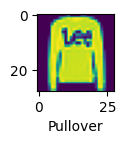

In [97]:
plot_function(1)